In [5]:
from gensim.models import word2vec

sentences = word2vec.Text8Corpus('/home/centos/leon/text8')  # 加载语料
model = word2vec.Word2Vec(sentences, size=200)

# 计算两个词的相似度/相关程度
model.similarity('javascript', 'java')  # 0.76480076728891522
# 计算词相似性
model.most_similar(positive = ['woman','king'],negative = ['man'], topn=2)  # [(u'queen', 0.6535179615020752), (u'throne', 0.5941931009292603)]


[(u'queen', 0.6535179615020752), (u'throne', 0.5941931009292603)]

In [6]:
# 单个词的词向量
vec1 = model['good']
print(vec1.shape)  # (200,)

(200,)


In [8]:
# 算两个词的相似度（余弦距离）
print(model.wv.similarity('human', 'user'))  # 0.184616488187
print(model.wv.similarity('human', 'survey'))  # 0.124308090715

# 计算两个文档的距离（结果越大越不相似）
print(model.wv.wmdistance(['human'], ['user']))  # 21.1505012512
print(model.wv.wmdistance(['human'], ['survey']))  # 18.0471343994

# 取与给定词最相近的topn个词
print(model.wv.most_similar(['human'], topn=3))  # [(u'animal', 0.5763854384422302), (u'humans', 0.565132737159729), (u'sentient', 0.557231068611145)]

# 找出与其他词差异最大的词
print(model.wv.doesnt_match(['human','user','survey']))  # survey

0.184616488187
0.124308090715
21.1505012512
18.0471343994
[(u'animal', 0.5763854384422302), (u'humans', 0.565132737159729), (u'sentient', 0.557231068611145)]
survey


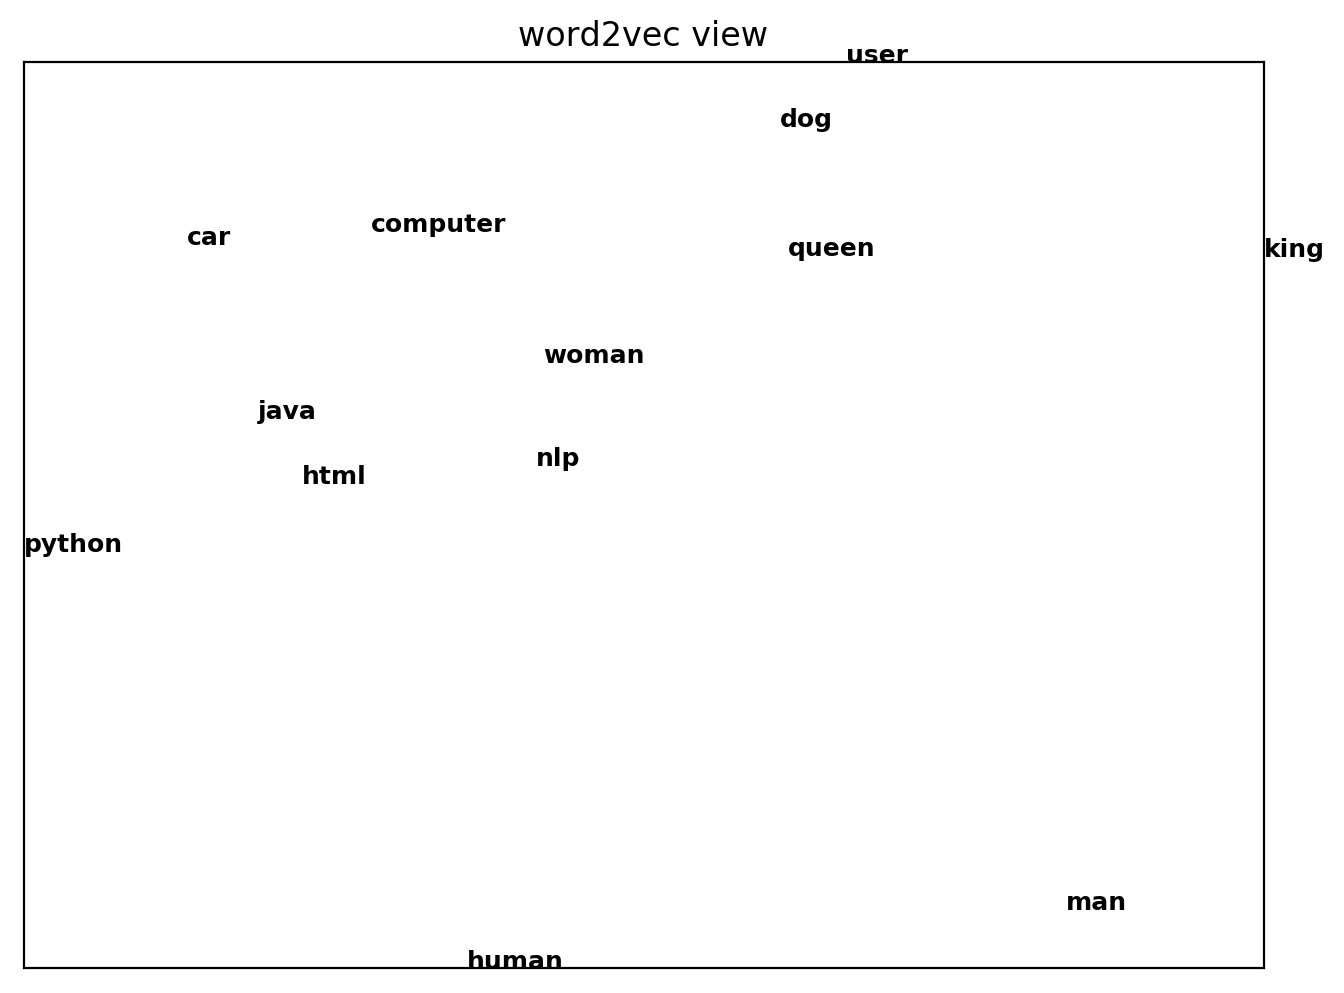

In [34]:
# 词在空间的关系可视化
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from gensim.models import word2vec


def plot_embedding(word_labels, word_vecs, title='', figsize=(8, 6), dpi=200):
    """
    词向量可视化
    :param word_labels: list，词标签
    :param word_vecs: list，词向量
    :param title: str
    :param figsize: tuple，画布大小
    :param dpi: int，画布像素
    :return 
    """
    x_min, x_max = np.min(word_vecs, 0), np.max(word_vecs, 0)
    data = (word_vecs - x_min) / (x_max - x_min)
    
    fig = plt.figure(figsize=figsize, dpi=dpi)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(word_labels[i]), fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

sentences = word2vec.Text8Corpus('/home/centos/leon/text8')  # 加载语料
model = word2vec.Word2Vec(sentences, size=200)
view_words = ['human', 'man', 'woman', 'user', 'king', 'queen', 'python', 'nlp', 
              'java', 'html', 'computer', 'dog', 'car']
word_vecs = [model[word] for word in view_words]
fig = plot_embedding(view_words, word_vecs, 'word2vec view')
plt.show(fig)